In [ ]:
# !pip install pandas
# !pip install matplotlib
# !pip install seaborn

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
# https://www.kaggle.com/datasets/aryarishabh/of-genomes-and-genetics-hackerearth-ml-challenge?select=train.csv
raw = pd.read_csv("genomes_genetics.csv")

## Task
Given medical information about children who have genetic disorders predict genetic disorder subclass (genetic disorder can be defined by given subclass).

## Data overview

In [3]:
raw.head()

,Patient Id,Patient Age,Genes in mother's side,Inherited from father,Maternal gene,Paternal gene,Blood cell count (mcL),Patient First Name,Family Name,Father's name,...,Birth defects,White Blood cell count (thousand per microliter),Blood test result,Symptom 1,Symptom 2,Symptom 3,Symptom 4,Symptom 5,Genetic Disorder,Disorder Subclass
0,PID0x6418,2.0,Yes,No,Yes,No,4.760603,Richard,NaN,Larre,...,NaN,9.857562,NaN,1.0,1.0,1.0,1.0,1.0,Mitochondrial genetic inheritance disorders,Leber's hereditary optic neuropathy
1,PID0x25d5,4.0,Yes,Yes,No,No,4.910669,Mike,NaN,Brycen,...,Multiple,5.522560,normal,1.0,NaN,1.0,1.0,0.0,NaN,Cystic fibrosis
2,PID0x4a82,6.0,Yes,No,No,No,4.893297,Kimberly,NaN,Nashon,...,Singular,NaN,normal,0.0,1.0,1.0,1.0,1.0,Multifactorial genetic inheritance disorders,Diabetes
3,PID0x4ac8,12.0,Yes,No,Yes,No,4.705280,Jeffery,Hoelscher,Aayaan,...,Singular,7.919321,inconclusive,0.0,0.0,1.0,0.0,0.0,Mitochondrial genetic inheritance disorders,Leigh syndrome
4,PID0x1bf7,11.0,Yes,No,NaN,Yes,4.720703,Johanna,Stutzman,Suave,...,Multiple,4.098210,NaN,0.0,0.0,0.0,0.0,NaN,Multifactorial genetic inheritance disorders,Cancer


In [4]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 45 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Id                                        22083 non-null  object 
 1   Patient Age                                       20656 non-null  float64
 2   Genes in mother's side                            22083 non-null  object 
 3   Inherited from father                             21777 non-null  object 
 4   Maternal gene                                     19273 non-null  object 
 5   Paternal gene                                     22083 non-null  object 
 6   Blood cell count (mcL)                            22083 non-null  float64
 7   Patient First Name                                22083 non-null  object 
 8   Family Name                                       12392 non-null  object 
 9   Father's name    

### Data selection

In [5]:
raw.drop(["Patient Id", 
          "Patient First Name",
          "Family Name",
          "Father's name",
          "Institute Name",
          "Location of Institute",
          "Test 1",
          "Test 2",
          "Test 3",
          "Test 4",
          "Test 5",
          "Symptom 1",
          "Symptom 2",
          "Symptom 3",
          "Symptom 4",
          "Symptom 5",
          "Parental consent",
        ], axis=1, inplace=True)

In [6]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                                            Non-Null Count  Dtype  
---  ------                                            --------------  -----  
 0   Patient Age                                       20656 non-null  float64
 1   Genes in mother's side                            22083 non-null  object 
 2   Inherited from father                             21777 non-null  object 
 3   Maternal gene                                     19273 non-null  object 
 4   Paternal gene                                     22083 non-null  object 
 5   Blood cell count (mcL)                            22083 non-null  float64
 6   Mother's age                                      16047 non-null  float64
 7   Father's age                                      16097 non-null  float64
 8   Status                                            22083 non-null  object 
 9   Respiratory Rate 

In [7]:
raw.rename(columns={
                    "Patient Age":"Patient_Age",
                    "Genes in mother's side":"Genes_Mother_Side",
                    "Inherited from father":"Inherited_Father",
                    "Maternal gene":"Maternal_Gene",
                    "Paternal gene":"Paternal_Gene",
                    "Blood cell count (mcL)":"Blood_Cell_mcL",
                    "Mother's age":"Mother_Age",
                    "Father's age":"Father_Age",
                    "Respiratory Rate (breaths/min)":"Respiratory_Rate_Breaths_Min",
                    "Heart Rate (rates/min":"Heart_Rates_Min",
                    "Follow-up":"Follow_Up",
                    "Birth asphyxia":"Birth_Asphyxia",
                    "Autopsy shows birth defect (if applicable)":"Autopsy_Birth_Defect",
                    "Place of birth":"Place_Birth",
                    "Folic acid details (peri-conceptional)":"Folic_Acid",
                    "H/O serious maternal illness":"Maternal_Illness",
                    "H/O radiation exposure (x-ray)":"Radiation_Exposure",
                    "H/O substance abuse":"Substance_Abuse",
                    "Assisted conception IVF/ART":"Assisted_Conception",
                    "History of anomalies in previous pregnancies":"History_Previous_Pregnancies",
                    "No. of previous abortion":"Previous_Abortion",
                    "Birth defects":"Birth_Defects",
                    "White Blood cell count (thousand per microliter)":"White_Blood_Cell",
                    "Blood test result":"Blood_Test_Result",
                    "Genetic Disorder":"Genetic_Disorder",
                    "Disorder Subclass":"Disorder_Subclass"
                    }, inplace=True)

In [8]:
raw.nunique()

Patient_Age                        15
Genes_Mother_Side                   2
Inherited_Father                    2
Maternal_Gene                       2
Paternal_Gene                       2
Blood_Cell_mcL                  22083
Mother_Age                         34
Father_Age                         45
Status                              2
Respiratory_Rate_Breaths_Min        2
Heart_Rates_Min                     2
Follow_Up                           2
Gender                              3
Birth_Asphyxia                      4
Autopsy_Birth_Defect                3
Place_Birth                         2
Folic_Acid                          2
Maternal_Illness                    2
Radiation_Exposure                  4
Substance_Abuse                     4
Assisted_Conception                 2
History_Previous_Pregnancies        2
Previous_Abortion                   5
Birth_Defects                       2
White_Blood_Cell                17277
Blood_Test_Result                   4
Genetic_Diso

In [9]:
_numerical = list(raw.describe().columns)
for c in raw.columns:
    if(c not in _numerical):
        print(raw[c].value_counts())
        print()

Genes_Mother_Side
Yes    13143
No      8940
Name: count, dtype: int64

Inherited_Father
No     13133
Yes     8644
Name: count, dtype: int64

Maternal_Gene
Yes    10647
No      8626
Name: count, dtype: int64

Paternal_Gene
No     12508
Yes     9575
Name: count, dtype: int64

Status
Alive       11083
Deceased    11000
Name: count, dtype: int64

Respiratory_Rate_Breaths_Min
Normal (30-60)    10065
Tachypnea          9869
Name: count, dtype: int64

Heart_Rates_Min
Normal         10187
Tachycardia     9783
Name: count, dtype: int64

Follow_Up
Low     10040
High     9877
Name: count, dtype: int64

Gender
Ambiguous    6695
Male         6666
Female       6549
Name: count, dtype: int64

Birth_Asphyxia
Yes              5106
No record        5008
Not available    4986
No               4844
Name: count, dtype: int64

Autopsy_Birth_Defect
Not applicable    11083
Yes                3383
No                 3225
Name: count, dtype: int64

Place_Birth
Institute    10073
Home          9886
Name: count, 

In [10]:
raw["Birth_Asphyxia"] = raw["Birth_Asphyxia"].replace("No record",np.NaN)
raw["Birth_Asphyxia"] = raw["Birth_Asphyxia"].replace("Not available",np.NaN)
raw["Autopsy_Birth_Defect"] = raw["Autopsy_Birth_Defect"].replace("None",np.NaN)
raw["Radiation_Exposure"] = raw["Radiation_Exposure"].replace("Not applicable",np.NaN)
raw["Radiation_Exposure"] = raw["Radiation_Exposure"].replace("-",np.NaN)
raw["Substance_Abuse"] = raw["Substance_Abuse"].replace("Not applicable",np.NaN)
raw["Substance_Abuse"] = raw["Substance_Abuse"].replace("-",np.NaN)

### Save cleared data

In [11]:
raw.to_csv('Disorders_dataset_cleared.zip', 
            compression={'method':'zip', 'archive_name':'Disorders_dataset_cleared.csv'})

## Data analysis

In [12]:
data = pd.read_csv("Disorders_dataset_cleared.csv")
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22083 entries, 0 to 22082
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   20656 non-null  float64
 1   Genes_Mother_Side             22083 non-null  object 
 2   Inherited_Father              21777 non-null  object 
 3   Maternal_Gene                 19273 non-null  object 
 4   Paternal_Gene                 22083 non-null  object 
 5   Blood_Cell_mcL                22083 non-null  float64
 6   Mother_Age                    16047 non-null  float64
 7   Father_Age                    16097 non-null  float64
 8   Status                        22083 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19934 non-null  object 
 10  Heart_Rates_Min               19970 non-null  object 
 11  Follow_Up                     19917 non-null  object 
 12  Gender                        19910 non-null  object 
 13  B

In [13]:
numerical = list(data.describe().columns)
categorical = [c for c in data.columns if c not in numerical]

In [14]:
numerical

['Patient_Age',
 'Blood_Cell_mcL',
 'Mother_Age',
 'Father_Age',
 'Previous_Abortion',
 'White_Blood_Cell']

In [15]:
categorical

['Genes_Mother_Side',
 'Inherited_Father',
 'Maternal_Gene',
 'Paternal_Gene',
 'Status',
 'Respiratory_Rate_Breaths_Min',
 'Heart_Rates_Min',
 'Follow_Up',
 'Gender',
 'Birth_Asphyxia',
 'Autopsy_Birth_Defect',
 'Place_Birth',
 'Folic_Acid',
 'Maternal_Illness',
 'Radiation_Exposure',
 'Substance_Abuse',
 'Assisted_Conception',
 'History_Previous_Pregnancies',
 'Birth_Defects',
 'Blood_Test_Result',
 'Genetic_Disorder',
 'Disorder_Subclass']

### Calculate missing values %

In [16]:
data.isna().mean().sort_values(ascending=False)

Birth_Asphyxia                  0.549427
Radiation_Exposure              0.547842
Substance_Abuse                 0.546801
Mother_Age                      0.273332
Father_Age                      0.271068
Autopsy_Birth_Defect            0.198886
Maternal_Gene                   0.127247
Gender                          0.098401
History_Previous_Pregnancies    0.098356
Disorder_Subclass               0.098175
Follow_Up                       0.098084
Previous_Abortion               0.097903
Birth_Defects                   0.097541
Maternal_Illness                0.097451
Respiratory_Rate_Breaths_Min    0.097315
White_Blood_Cell                0.097269
Genetic_Disorder                0.097179
Blood_Test_Result               0.097134
Place_Birth                     0.096183
Assisted_Conception             0.096092
Folic_Acid                      0.095866
Heart_Rates_Min                 0.095684
Patient_Age                     0.064620
Inherited_Father                0.013857
Blood_Cell_mcL  

In [17]:
print(f'{data.isna().sum().sum() / (data.shape[0] * data.shape[1])*100 : .2f}% is missing')

 14.47% is missing


In [18]:
print('N/A ', data["Genetic_Disorder"].isna().sum() / data.shape[0])
data["Genetic_Disorder"].value_counts() / data.shape[0]

N/A  0.09717882534075986


Genetic_Disorder
Mitochondrial genetic inheritance disorders     0.461984
Single-gene inheritance diseases                0.347054
Multifactorial genetic inheritance disorders    0.093783
Name: count, dtype: float64

In [19]:
print('N/A ', data["Disorder_Subclass"].isna().sum() / data.shape[0])
data["Disorder_Subclass"].value_counts() / data.shape[0]

N/A  0.09817506679346104


Disorder_Subclass
Leigh syndrome                         0.233664
Mitochondrial myopathy                 0.199475
Cystic fibrosis                        0.156138
Tay-Sachs                              0.128289
Diabetes                               0.082280
Hemochromatosis                        0.061359
Leber's hereditary optic neuropathy    0.029344
Alzheimer's                            0.006883
Cancer                                 0.004393
Name: count, dtype: float64

### Numerical data analysis

In [20]:
data.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,20656.000000,22083.000000,16047.000000,16097.000000,19921.000000,19935.000000
mean,6.974148,4.898871,34.526454,41.972852,2.003062,7.486224
std,4.319475,0.199663,9.852598,13.035501,1.411919,2.653393
min,0.000000,4.092727,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.763109,26.000000,31.000000,1.000000,5.424703
50%,7.000000,4.899399,35.000000,42.000000,2.000000,7.477132
75%,11.000000,5.033830,43.000000,53.000000,3.000000,9.526152
max,14.000000,5.609829,51.000000,64.000000,4.000000,12.000000


<Axes: >

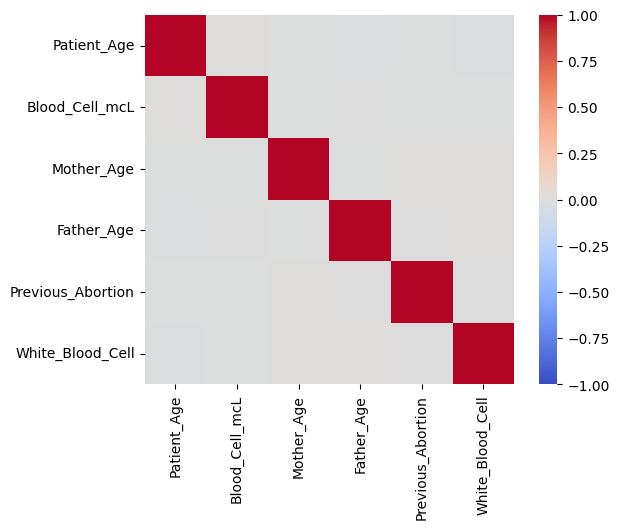

In [21]:
corr_mat = data.corr(numeric_only=True)
sns.heatmap(corr_mat, square=True, vmin=-1, vmax=1, cmap='coolwarm')

- As we can see there is no correlation between numerical data.

### Check and remove outliers

In [22]:
for c in numerical:
    num = data[c]
    Q1 = num.quantile(0.25)
    Q3 = num.quantile(0.75)
    IQR = Q3 - Q1
    out = num[((num < (Q1 - 1.5 * IQR)) | (num > (Q3 + 1.5 * IQR)))]
    print(f'{c : <20}', len(out))

Patient_Age          0
Blood_Cell_mcL       143
Mother_Age           0
Father_Age           0
Previous_Abortion    0
White_Blood_Cell     0


In [23]:
col = data["Blood_Cell_mcL"]
Q1 = col.quantile(0.25)
Q3 = col.quantile(0.75)
IQR = Q3 - Q1
rows_to_drop = col[((col < (Q1 - 1.5 * IQR)) | (col > (Q3 + 1.5 * IQR)))].index
data.drop(rows_to_drop, inplace=True)

In [24]:
data.shape

(21940, 28)

## Fill N/A data

In [25]:
data.isna().sum()

Patient_Age                      1415
Genes_Mother_Side                   0
Inherited_Father                  305
Maternal_Gene                    2795
Paternal_Gene                       0
Blood_Cell_mcL                      0
Mother_Age                       5995
Father_Age                       5947
Status                              0
Respiratory_Rate_Breaths_Min     2134
Heart_Rates_Min                  2100
Follow_Up                        2158
Gender                           2163
Birth_Asphyxia                  12064
Autopsy_Birth_Defect             4371
Place_Birth                      2117
Folic_Acid                       2103
Maternal_Illness                 2140
Radiation_Exposure              12024
Substance_Abuse                 11994
Assisted_Conception              2103
History_Previous_Pregnancies     2159
Previous_Abortion                2145
Birth_Defects                    2138
White_Blood_Cell                 2136
Blood_Test_Result                2132
Genetic_Diso

In [26]:
# data["Genetic_Disorder"].mode()

# data.groupby(["Disorder_Subclass"])["Genetic_Disorder"].agg(pd.Series.mode)
# data.groupby(["Disorder_Subclass"])["Genetic_Disorder"].apply(lambda x : x.mode())
# data.groupby(["Disorder_Subclass"])["Genetic_Disorder"].transform(lambda x : x.mode())[:15]

# data.groupby(["Disorder_Subclass"])["Mother_Age"].mean()
# data.groupby(["Disorder_Subclass"])["Mother_Age"].transform('mean')

In [27]:
data.drop(columns=["Genetic_Disorder"], inplace=True)

In [28]:
for c in data.columns:
    print(f'{c : <30}', data[c].mode()[0])

Patient_Age                    4.0
Genes_Mother_Side              Yes
Inherited_Father               No
Maternal_Gene                  Yes
Paternal_Gene                  No
Blood_Cell_mcL                 4.357634000828609
Mother_Age                     23.0
Father_Age                     20.0
Status                         Alive
Respiratory_Rate_Breaths_Min   Normal (30-60)
Heart_Rates_Min                Normal
Follow_Up                      Low
Gender                         Ambiguous
Birth_Asphyxia                 Yes
Autopsy_Birth_Defect           Not applicable
Place_Birth                    Institute
Folic_Acid                     Yes
Maternal_Illness               No
Radiation_Exposure             No
Substance_Abuse                No
Assisted_Conception            Yes
History_Previous_Pregnancies   Yes
Previous_Abortion              2.0
Birth_Defects                  Singular
White_Blood_Cell               3.0
Blood_Test_Result              slightly abnormal
Disorder_Subclass    

In [29]:
categorical.remove("Genetic_Disorder")
for c in categorical:
    if(c != "Disorder_Subclass"):
        data[c].fillna(data[c].mode()[0], inplace=True)

In [30]:
for c in numerical:
    data[c].fillna(data.groupby(["Disorder_Subclass"])[c].transform('mean') , inplace=True)

In [31]:
data.dropna(axis=0, inplace=True)
data.isna().sum().sum()

0

In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19784 entries, 0 to 22082
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Patient_Age                   19784 non-null  float64
 1   Genes_Mother_Side             19784 non-null  object 
 2   Inherited_Father              19784 non-null  object 
 3   Maternal_Gene                 19784 non-null  object 
 4   Paternal_Gene                 19784 non-null  object 
 5   Blood_Cell_mcL                19784 non-null  float64
 6   Mother_Age                    19784 non-null  float64
 7   Father_Age                    19784 non-null  float64
 8   Status                        19784 non-null  object 
 9   Respiratory_Rate_Breaths_Min  19784 non-null  object 
 10  Heart_Rates_Min               19784 non-null  object 
 11  Follow_Up                     19784 non-null  object 
 12  Gender                        19784 non-null  object 
 13  Birth_

### Vectorization of categorical data

In [33]:
data[categorical].nunique()

Genes_Mother_Side               2
Inherited_Father                2
Maternal_Gene                   2
Paternal_Gene                   2
Status                          2
Respiratory_Rate_Breaths_Min    2
Heart_Rates_Min                 2
Follow_Up                       2
Gender                          3
Birth_Asphyxia                  2
Autopsy_Birth_Defect            3
Place_Birth                     2
Folic_Acid                      2
Maternal_Illness                2
Radiation_Exposure              2
Substance_Abuse                 2
Assisted_Conception             2
History_Previous_Pregnancies    2
Birth_Defects                   2
Blood_Test_Result               4
Disorder_Subclass               9
dtype: int64

In [34]:
binary = [c for c in categorical if len(data[c].unique()) == 2]
nonbinary = [c for c in categorical if len(data[c].unique()) > 2]
nonbinary.remove("Disorder_Subclass")
nonbinary

['Gender', 'Autopsy_Birth_Defect', 'Blood_Test_Result']

In [35]:
for c in binary:
    n = data[c].unique()
    data[c].replace(n[0], 0, inplace=True)
    data[c].replace(n[1], 1, inplace=True)

In [36]:
data_nonbinary = pd.get_dummies(data[nonbinary])
print(data_nonbinary.columns)

Index(['Gender_Ambiguous', 'Gender_Female', 'Gender_Male',
       'Autopsy_Birth_Defect_No', 'Autopsy_Birth_Defect_Not applicable',
       'Autopsy_Birth_Defect_Yes', 'Blood_Test_Result_abnormal',
       'Blood_Test_Result_inconclusive', 'Blood_Test_Result_normal',
       'Blood_Test_Result_slightly abnormal'],
      dtype='object')


In [37]:
data_nonbinary.head()

,Gender_Ambiguous,Gender_Female,Gender_Male,Autopsy_Birth_Defect_No,Autopsy_Birth_Defect_Not applicable,Autopsy_Birth_Defect_Yes,Blood_Test_Result_abnormal,Blood_Test_Result_inconclusive,Blood_Test_Result_normal,Blood_Test_Result_slightly abnormal
0,True,False,False,False,True,False,False,False,False,True
1,True,False,False,False,True,False,False,False,True,False
2,True,False,False,False,True,False,False,False,True,False
3,False,False,True,True,False,False,False,True,False,False
4,False,False,True,False,True,False,False,False,False,True


### Normalize quantitative features

In [38]:
data_num = data[numerical]
data_num.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000,19784.000000
mean,6.946371,4.898718,34.543872,41.964605,2.002872,7.479927
std,4.178293,0.194455,8.460585,11.262538,1.343448,2.526946
min,0.000000,4.357634,18.000000,20.000000,0.000000,3.000000
25%,3.000000,4.764380,29.000000,34.000000,1.000000,5.640401
50%,7.000000,4.899377,34.476078,42.000000,2.000000,7.487254
75%,10.000000,5.032267,40.000000,50.000000,3.000000,9.283591
max,14.000000,5.439651,51.000000,64.000000,4.000000,12.000000


In [39]:
data_num = (data_num - data_num.mean(axis = 0))/data_num.std(axis = 0)
data_num.describe()

,Patient_Age,Blood_Cell_mcL,Mother_Age,Father_Age,Previous_Abortion,White_Blood_Cell
count,1.978400e+04,1.978400e+04,1.978400e+04,1.978400e+04,1.978400e+04,1.978400e+04
mean,1.199562e-16,-2.907680e-15,6.784347e-16,6.689172e-17,-7.183004e-17,9.409735e-17
std,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
min,-1.662490e+00,-2.782562e+00,-1.955405e+00,-1.950236e+00,-1.490844e+00,-1.772862e+00
25%,-9.444937e-01,-6.908437e-01,-6.552587e-01,-7.071767e-01,-7.464908e-01,-7.279638e-01
50%,1.283511e-02,3.392367e-03,-8.012987e-03,3.142755e-03,-2.137433e-03,2.899695e-03
75%,7.308317e-01,6.867842e-01,6.448877e-01,7.134622e-01,7.422159e-01,7.137723e-01
max,1.688160e+00,2.781786e+00,1.945034e+00,1.956521e+00,1.486569e+00,1.788749e+00


### Merge numerical, nonbinary, binary

In [40]:
data = pd.concat((data_num, data[binary], data_nonbinary, data["Disorder_Subclass"]), axis=1)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19784 entries, 0 to 22082
Data columns (total 34 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Patient_Age                          19784 non-null  float64
 1   Blood_Cell_mcL                       19784 non-null  float64
 2   Mother_Age                           19784 non-null  float64
 3   Father_Age                           19784 non-null  float64
 4   Previous_Abortion                    19784 non-null  float64
 5   White_Blood_Cell                     19784 non-null  float64
 6   Genes_Mother_Side                    19784 non-null  int64  
 7   Inherited_Father                     19784 non-null  int64  
 8   Maternal_Gene                        19784 non-null  int64  
 9   Paternal_Gene                        19784 non-null  int64  
 10  Status                               19784 non-null  int64  
 11  Respiratory_Rate_Breaths_Min     

## Split into train and test

In [42]:
X = data.drop("Disorder_Subclass", axis=1) # Drop target
X = X.to_numpy()

In [43]:
Y = data["Disorder_Subclass"]
Y = pd.get_dummies(Y)
Y = Y.to_numpy()

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 42)
print(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape)

(13848, 33) (13848, 9) (5936, 33) (5936, 9)


## Test learning algorithms

### KNN

In [47]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 10)
knn.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=10)

In [48]:
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.11313267445342917


In [64]:
knn = KNeighborsClassifier(n_neighbors = 20, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.11122342018568433


In [66]:
knn = KNeighborsClassifier(n_neighbors = 50, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.1111111111111111


In [67]:
knn = KNeighborsClassifier(n_neighbors = 150, n_jobs=-1)
knn.fit(X_train, Y_train)
Y_test_predict = knn.predict(X_test)
err_test  = np.mean(Y_test != Y_test_predict)
print("Error: ", err_test)

Error:  0.1111111111111111


- n_neighbours=50 is optimal hyperparameter value

### Random Forest
Is used for classification problems with categorical target variables.

In [69]:
from sklearn import ensemble

In [56]:
rf = ensemble.RandomForestClassifier(n_estimators = 1000, n_jobs=-1)
rf.fit(X_train, Y_train)

RandomForestClassifier(n_estimators=1000, n_jobs=-1)

In [57]:
err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))
print(err_train, err_test)

0.0 0.08623465109314166


In [76]:
rf = ensemble.RandomForestClassifier(n_estimators = 100, n_jobs=-1)
rf.fit(X_train, Y_train)
err_train = np.mean(Y_train != rf.predict(X_train))
err_test  = np.mean(Y_test  != rf.predict(X_test))
print(err_train, err_test)

1.604724308363823e-05 0.08769466906259359


- Random Forest shows better quality than KNN